<a href="https://colab.research.google.com/github/sileeee/python_crawling_study/blob/master/%ED%81%AC%EB%A1%A4%EB%A7%81week6(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 페이지 변경하며 데이터 수집하기

- 동적페이지에서는 URL이 변하지 않기 때문에 요청값 규칙을 이용할 수 없다. -> 페이지 버튼을 클릭하여 데이터 수집해야한다.

- 페이지 버튼의 코드는 쉽게 룰을 찾을 수 없다.

#### 모든 태그를 선택할 수 있는 선택자
```
div.paginate > *
```
- 위와 같은 선택자로 데이터를 검색하면 페이지바(페이지 버튼을 포함하고 있는 부분)의 모든 버튼이 선택된다.

- selenium의 find_elements_by_css_selector()함수를 사용하면 모든 버튼을 리스트 형태로 저장할 수 있다.
```
page_bar = driver.find_elements_by_css_selector('div.paginate > *')
```
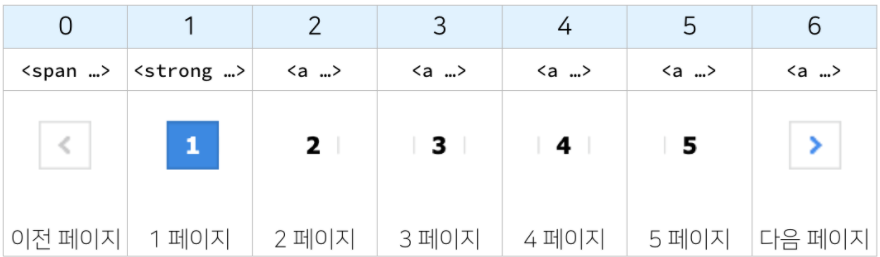

In [ ]:
time.sleep(1)

# 컨테이너(가게 정보) 수
stores = driver.find_elements_by_css_selector("div.lsnx")
for store in stores:
    # 세부 데이터 수집
    name = store.find_element_by_css_selector("dt > a").text
    addr = store.find_element_by_css_selector("dd.addr").text
    phone = store.find_element_by_css_selector("dd.tel").text

    print(name, addr, phone)

page_bar = driver.find_elements_by_css_selector("div.paginate > *")
page_bar[2].click() #2페이지 버튼으로 이동

In [ ]:
###################5페이지까지 반복###############################
# 반복문 for를 추가해줍니다.
# 여기서 임시변수 n은 현재 페이지를 의미합니다.
for n in range(1, 5):
##################################################
    time.sleep(1)

    # 컨테이너(가게 정보) 수
    stores = driver.find_elements_by_css_selector("div.lsnx")
    for store in stores:
        # 세부 데이터 수집
        name = store.find_element_by_css_selector("dt > a").text
        addr = store.find_element_by_css_selector("dd.addr").text
        phone = store.find_element_by_css_selector("dd.tel").text

        print(name, addr, phone)

    page_bar = driver.find_elements_by_css_selector("div.paginate > *")
    ##################################################
    # page_bar의 인덱싱 부분을 다음페이지(n+1)로 바꿔줍니다.
    page_bar[n+1].click()
    ##################################################

### Selenium 데이터 수집기 완성하기

[ 지금까지 코드의 문제 ]
1. 6페이지 이후의 데이터를 수집하기 어렵다
2. 전화번호가 없는 경우 에러가 발생
3. 다음페이지가 없는 경우 에러가 발생


In [ ]:
# 범위를 크게 증가시켜줍니다.(20페이지까지)
for n in range(1, 20):
##################################################
    time.sleep(1)

    # 컨테이너(가게 정보) 수
    stores = driver.find_elements_by_css_selector("div.lsnx")
    for store in stores:
        # 세부 데이터 수집
        name = store.find_element_by_css_selector("dt > a").text
        addr = store.find_element_by_css_selector("dd.addr").text
        phone = store.find_element_by_css_selector("dd.tel").text

        print(name, addr, phone)

    page_bar = driver.find_elements_by_css_selector("div.paginate > *")
    ##################################################
    # % 연산자를 활용해서 조건문을 추가합니다.
    # 현재 페이지(n)가 5의 배수가 아닌 경우 n%5+1 페이지 버튼 클릭
    if n%5 != 0:
        page_bar[n%5+1].click()
        
    # 현재 페이지(n)가 5의 배수인 경우 다음페이지 버튼을 클릭
    else:
        page_bar[6].click()

#### 전화번호가 없는 경우 에러처리

In [ ]:
# 전화번호 수집을 시도합니다.
try:
    phone = store.find_element_by_css_selector("dd.tel").text
# 전화번호 수집에서 에러가 발생하면 phone에 "전화번호 없음"을 저장합니다.
except:
    phone = "전화번호 없음"
    # 유의할 점은 except 구문에서 전화번호를 대체할 문자열을 넣어주어야함

#### 다음 페이지가 없는 경우 에러처리

In [ ]:
try:
        if n % 5 != 0:
            page_bar[n % 5 + 1].click()
        else:
            page_bar[6].click()
    except:
        print("데이터 수집 완료")
        break

#### 네이버 지도 데이터수집 코드

In [ ]:
# 셀레니움 연습하기
from selenium import webdriver
import time

#1. 웹드라이버 켜기
driver = webdriver.Chrome("./chromedriver")
#2. 네이버 지도 접속하기
driver.get("https://v4.map.naver.com/")

# !!)네이버 지도 업데이트로 추
driver.find_elements_by_css_selector("button.btn_close")[1].click()

#3. 검색창에 검색어 입력하기 // 검색창: input#search-input
search_box = driver.find_element_by_css_selector("input#search-input")
search_box.send_keys("오골계")
#4. 검색버튼 누르기 // 검색버튼: button.spm
search_button = driver.find_element_by_css_selector("button.spm")
search_button.click()
#5. 검색 결과 확인하기

for n in range(1, 20):
    # 지연시간주기
    time.sleep(1)

    # 컨테이너 dl.lsnx_det
    # stores = html.select("dl.lsnx_det")
    stores = driver.find_elements_by_css_selector("dl.lsnx_det")

    for s in stores:
        name = s.find_element_by_css_selector("dt > a").text
        addr = s.find_element_by_css_selector("dd.addr").text

        try:
            tel = s.find_element_by_css_selector("dd.tel").text
        except:
            tel = "전화번호 없음"
        # 가게 이름 dt > a
        # 가게 주소 dd.addr
        # 전화번호 dd.tel

        print(name)
        print(addr)
        print(tel)

    # 페이지버튼 div.paginate > *
    page_bar = driver.find_elements_by_css_selector("div.paginate > *")

    try:
        if n%5 != 0:
            page_bar[n%5+1].click()
        else:
            page_bar[6].click()
    except:
        print("수집완료")
        break

### 구글지도 데이터 수집하기

In [ ]:
from selenium import webdriver
import time

# 크롬창(웹드라이버) 열기
driver = webdriver.Chrome("./chromedriver")

# 구글 지도 접속하기
driver.get("https://www.google.com/maps/")

# 검색창에 "카페" 입력하기
searchbox = driver.find_element_by_css_selector("input#searchboxinput")
searchbox.send_keys("카페")

# 검색버튼 누르기
searchbutton = driver.find_element_by_css_selector("button#searchbox-searchbutton")
searchbutton.click()

# 여러 페이지(999)에서 반복하기
for i in range(999):
    # 시간 지연
    time.sleep(3)

    # 컨테이너(가게) 데이터 수집 // div.section-result-content
    stores = driver.find_elements_by_css_selector("div.section-result-content")

    for s in stores:
        # 가게 이름 데이터 수집 // h3.section-result-title
        title = s.find_element_by_css_selector("h3.section-result-title").text

        # 평점 데이터 수집 // span.cards-rating-score
        # 평점이 없는 경우 에러 처리
        try:
            score = s.find_element_by_css_selector("span.cards-rating-score").text
        except:
            score = "평점없음"

        # 가게 주소 데이터 수집 // span.section-result-location
        addr = s.find_element_by_css_selector("span.section-result-location").text

        print(title, "/", score, "/", addr)

    # 다음페이지 버튼 클릭 하기
    # 다음페이지가 없는 경우(데이터 수집 완료) 에러 처리
    try:
        nextpage = driver.find_element_by_css_selector("button#n7lv7yjyC35__section-pagination-button-next")
        nextpage.click()
    except:
        print("데이터 수집 완료.")
        break

# 크롬창 닫기
# driver.close()